## Simple Linear Regression
### Objectives
- Use scikit-learn to implement simple linear regression
- Create a model, train it, test it and use the model

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [1]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [10]:
import requests

def download(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

# Example usage:
download('http://example.com/data.csv', 'data.csv')


### Understanding the data
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
Data source: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

### Reading the data in

In [9]:
df = pd.read_csv("FuelConsumption.csv")

# Take a look at dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data exploration
Let's first have a descriptive exploration on our data

In [11]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [18]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6


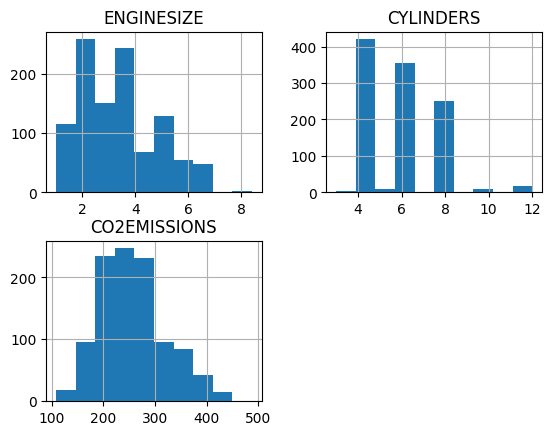

In [13]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

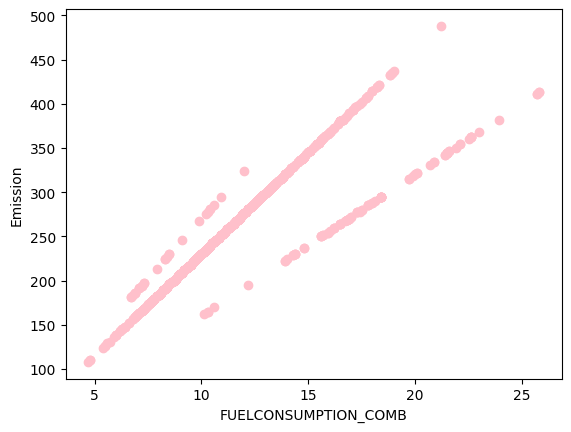

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='pink')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

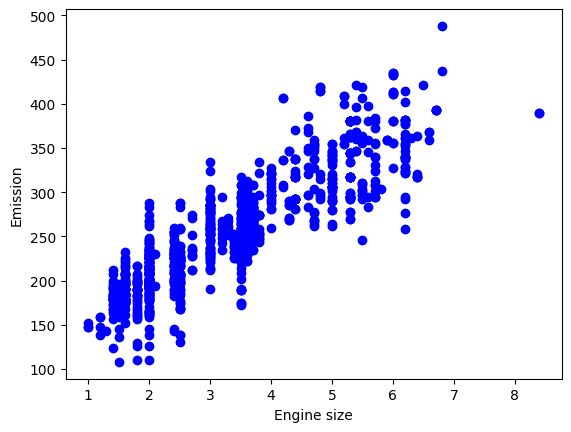

In [20]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

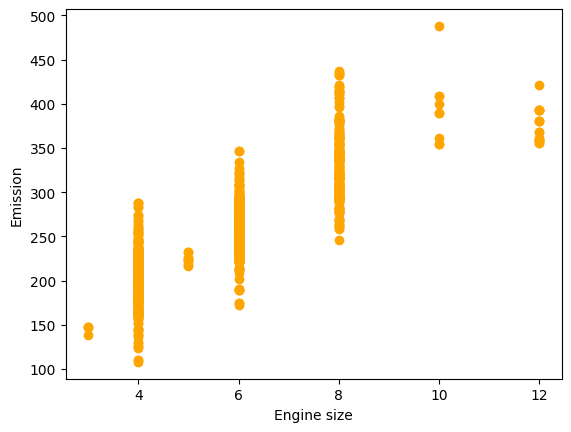

In [22]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='orange')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Creating train and test dataset
Train/Test Split involves dividing the dataset into two distinct sets: a training set and a testing set. The model is trained using the training set and evaluated using the testing set. This method provides a more accurate measure of out-of-sample accuracy since the testing dataset is not used during the training process. As a result, it offers a clearer picture of how well the model generalizes to new, unseen data.

In this approach, we know the actual outcomes for each data point in the testing dataset, making it an ideal tool for evaluating the model. Since the model hasn't been trained on this data, it has no prior knowledge of these outcomes, ensuring that the evaluation is genuinely out-of-sample.

Let's proceed by splitting our dataset into training and testing sets, using 80% of the data for training and 20% for testing. We can achieve this by creating a mask to randomly select rows with the np.random.rand() function:

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test  = cdf[~msk]

### Simple regression model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution


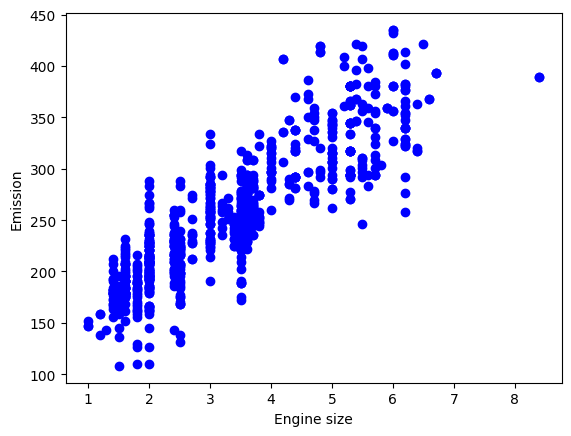

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[39.39096987]]
Intercept:  [124.66670866]



As previously discussed, the coefficients and intercept in simple linear regression are the parameters that define the fit line. In the case of simple linear regression, which involves only two parameters, sklearn can estimate these parameters directly from the data. These parameters represent the intercept and slope of the line. It's important to note that all of the data must be available to traverse and calculate these parameters.

#### Plot outputs

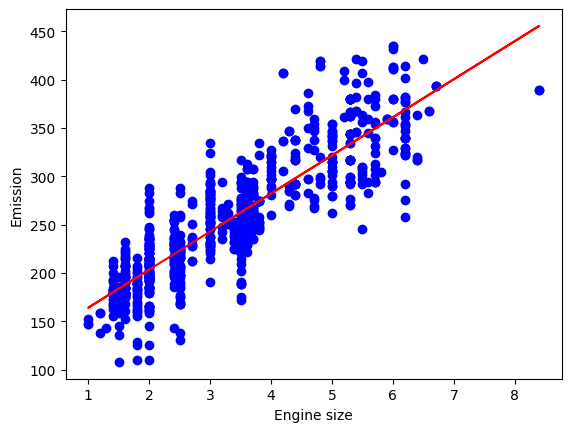

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Evaluation
To evaluate the accuracy of a regression model, we compare the actual values with the predicted values. Evaluation metrics play a crucial role in model development, providing insights into areas that need improvement.

Several model evaluation metrics can be used. Here, we will use Mean Squared Error (MSE) to calculate the accuracy of our model based on the test set:

Mean Absolute Error (MAE): This metric calculates the mean of the absolute values of the errors. It's straightforward to understand as it represents the average error directly.

Mean Squared Error (MSE): MSE is the mean of the squared errors. It's more popular than MAE because it places a greater emphasis on larger errors due to the squaring process, which can help highlight significant inaccuracies.

Root Mean Squared Error (RMSE): This metric is the square root of the MSE. It provides an error metric in the same units as the target variable, making it easier to interpret.

R-squared (R²): While not an error metric, R-squared is a popular measure of how well the regression model fits the data. It indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. The best possible score is 1.0, but it can be negative if the model performs worse than a horizontal line (mean of the target values).

In [27]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.66
Residual sum of squares (MSE): 798.81
R2-score: 0.78


Let's see what the evaluation metrics are if we trained a regression model using the FUELCONSUMPTION_COMB feature.

In [28]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[15.89469353]]
Intercept:  [71.62319574]


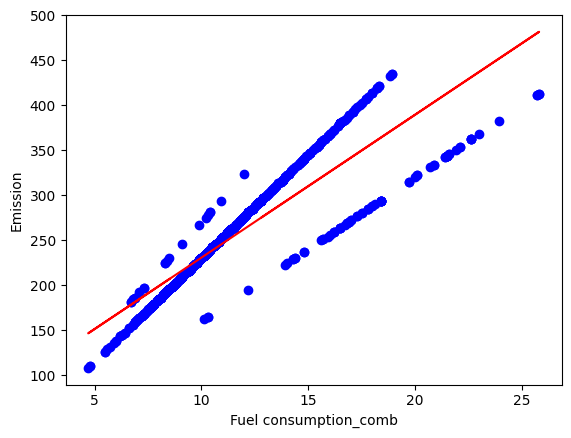

In [29]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel("Fuel consumption_comb")
plt.ylabel("Emission")
plt.show()

In [30]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 18.48
Residual sum of squares (MSE): 665.24
R2-score: 0.81
